<a href="https://colab.research.google.com/github/JVTemponi/Notebooks/blob/main/MovieLens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dados Movie Lens

##Nesta primeira etapa, os dados do MovieLens serão manipulados através das bibliotecas pandas e seaborn. Para manipular as informações e gerar análises acerca das pontuações aplicadas aos filmes, a planilha de notas foi importada.

###Importando a planilha e alterando o nome das colunas para portugês.

In [62]:
import pandas as pd 
import seaborn as sns

notas = pd.read_csv("ratings.csv")
notas.columns = ["usuarioId", "filmeId", "nota","momento"]
notas.head(10)

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


###Visualizando todos valores distindos aplicados à coluna "nota"

In [63]:
notas.nota.unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

###Quantidade de vezes em que cada valor se repete no arquivo, ordenando da maior frequência para a menor

In [26]:
notas.nota.value_counts( sort = True)

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

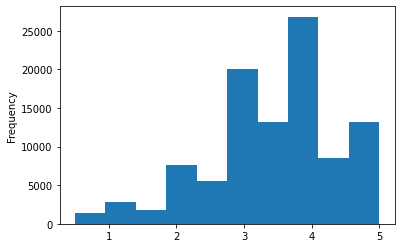

In [29]:
notas.nota.plot(kind='hist')

### Média e mediana respectivamente

In [24]:
print(notas.nota.mean())
print(notas.nota.median())

3.501556983616962
3.5


### Descrição geral dos dados referentes às notas

In [30]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

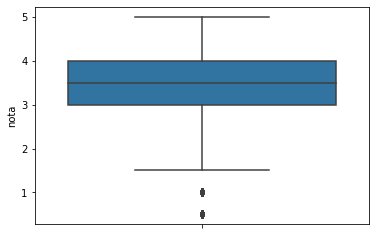

In [65]:
sns.boxplot(y=notas.nota)

## Validandos pontuações após filtrar os resgistros. A planilha de filmes foi importada para continuidade da análise.



In [68]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "genero"]
filmes.head(10)

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


###Analisando as notas por filmes, levando em consideração a média. 

In [85]:
medias_por_filme = notas.groupby("filmeId").mean().nota
medias_por_filme

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

No caso abaixo foi selecionado o filme Toy Story em específico

In [82]:
notas.query("filmeId == 1").nota.mean()

3.9209302325581397

### Descrição geral dos dados

In [86]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


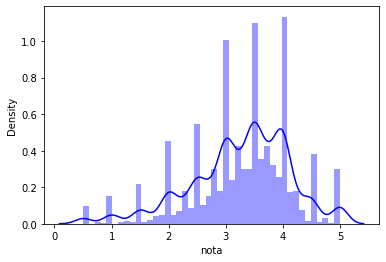

In [67]:
sns.distplot(medias_por_filme, color="blue")